# Summary
* Purpose: Compute resolution functions for PbTe CNCS dataset.
* Procedure:
  - Simulate beam
  - Prepare sample
  - Simulate resolution
* Ei=12meV
* T=150K

* sample cylinder radius=.5cm height=3.5cm at psi=0, the orientation of the axis is [-1,0,1] (x is beam, z is vertical up). u=002, v=220


# Tools

In [1]:
pwd

u'/SNS/users/lj7/notebooks/.rk-work/jnrk-analysis-node05-mcvine'

** Modify the workdir !!! **

In [1]:
workdir = "/SNS/users/lj7/simulations/CNCS/AgBiSe2/PbTe-try1/"
!mkdir -p {workdir}
%cd {workdir}

In [4]:
# %matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np, os, glob
import histogram.hdf as hh, histogram as H

In [5]:
!which mcvine

/home/lj7/dv/mcvine/export/bin/mcvine


In [6]:
import mcvine.cli

In [8]:
from dgsres.singlextal import use_res_comps
reload( use_res_comps )

# Beam

** NOTE: You can skip this section if there is existing beam simulation that you can reuse. Just make a symbolic link **

In [10]:
mkdir -p beam

In [10]:
cd {workdir}/beam/

/SNS/users/lj7/simulations/CNCS/AgBiSe2/PbTe-try1/beam


** Options for the beam simulation **

In [12]:
!mcvine instruments cncs beam -h


Simulate CNCS beam and analyze the beam.

Example:

 $ cncs_beam --E=5 --f1=60. --f2=60. --f3=60. --f41=300. --f42=300. --fluxmode=9.0 --ncount=1e8 --nodes=10

For more details of cmd line parameters, run:

 $ cncs_beam --help-properties




In [15]:
# Ei=15, highflux mode

In [15]:
rm -rf *out* *.params log* *.pml run*.sh

In [ ]:
%%time
!mcvine instruments cncs beam -E=12 -f1=60 -f2=60 -f3=60 -f41=300 -f42=300 -ncount=1e10 -fluxmode=9.0 -nodes=20 >log.sim

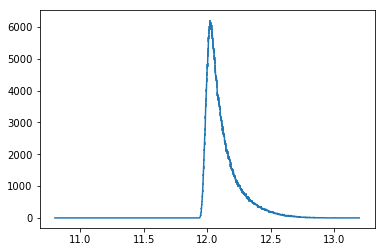

In [11]:
H.plot(hh.load('out/ienergy.h5'))

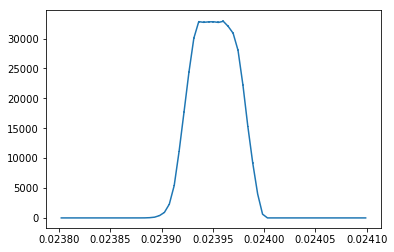

In [24]:
H.plot(hh.load('out/itof.h5')[(0.0238, 0.0241)])

In [12]:
ls out

ienergy.h5  ix_divx.h5  ix_y.h5     iy_divy.h5  props.json
itof.h5     ix_divy.h5  iy_divx.h5  neutrons    rank0-step0/


In [26]:
cat out/props.json

{'emission time': '136.433557079 microsecond', 'flux': '431587.101167 counts per 34kJ pulse', 'tof fwhm': '57.4412900376 microsecond', 'average tof': '23951.8666718 microsecond', 'average energy': '12.1196524 meV'}

In [30]:
!mcvine neutronstorage count out/neutrons

750346


# Sample

In [49]:
cd {workdir}

/SNS/users/lj7/simulations/CNCS/AgBiSe2/PbTe-try1


In [10]:
%%file sample.yaml
name: PbTe
chemical_formula: PbTe
lattice: 
 constants: 6.461, 6.461, 6.461, 90, 90, 90
 basis_vectors:
  - 6.461, 0, 0
  - 0, 6.461, 0
  - 0, 0, 6.461
excitations:
 - type: DGSresolution
orientation:
 u: 0, 0, 2
 v: 2, 2, 0
shape: |
       <rotation angles="-45.*deg, 0.*deg, 0.*deg">
         <cylinder radius=".5*cm" height="3.5*cm"/>
       </rotation>
temperature: 100*K

Overwriting sample.yaml


In [11]:
sampleyml = "{workdir}/sample.yaml".format(**locals())

In [12]:
print sampleyml

/SNS/users/lj7/simulations/CNCS/AgBiSe2/PbTe-try1//sample.yaml


# CNCS Instrument

In [13]:
beam = "/SNS/users/lj7/simulations/CNCS/AgBiSe2/PbTe-try1/beam/"
instrument = use_res_comps.instrument(
    name = 'CNCS',
    detsys_radius = "3.5*meter",
    L_m2s = "36.264*meter",
    offset_sample2beam = "-0.15*meter" # offset from sample to saved beam
    )
pixel = use_res_comps.pixel(
    radius = "0.5*inch",
    height = "2.*meter/128",
    pressure = "6*atm",
    )

# psi scan

In [14]:
class psi_scan:
    min = -74.
    max = 50.
    step = 1.

# Try one point

In [63]:
cd {workdir}

/SNS/users/lj7/simulations/CNCS/AgBiSe2/PbTe-try1


** Define projection direction and starting point **

In [64]:
hkl_projection = np.array([1,1,0])

In [65]:
hkl0 = np.array([0,0,4])
hkl0

array([0, 0, 4])

** Define point of interest **

In [66]:
E = 5
x = 0.

In [67]:
hkl = hkl0 + hkl_projection*x

In [68]:
hkl

array([ 0.,  0.,  4.])

** Run simulation setup **

In [69]:
rm -rf test/

In [70]:
use_res_comps.setup(
    'test',
    sampleyml, beam, E, hkl, hkl_projection,
    psi_scan, instrument, pixel)

Ei=12.1196524, t0=136.433557094
Computed:
* psi=-21.1779437223 degree
* Q=[  3.62720164e+00  -1.40529266e+00   2.01350139e-16]
* hkl2Qmat=[[  2.48422992e-01   6.41204719e-01  -6.87646330e-01]
 [  2.48422992e-01   6.41204719e-01   6.87646330e-01]
 [  9.06800410e-01  -3.51323165e-01   5.03375347e-17]]
* ki=2.41845180576
* vectors ki=[ 2.41845181  0.          0.        ], kf=[ -1.20874984e+00   1.40529266e+00  -2.01350139e-16]
These two numbers should be very close:
  5.0
  5.0
  Ei=12.1196524, Ef=7.1196524
* Ef=7.1196524
* pixel positon=[ -2.28235251e+00   2.65346321e+00  -3.80187844e-16]
* pixel_position=[ -2.28235251e+00   2.65346321e+00  -3.80187844e-16]
t_m2s=0.0239518666718, t_s2p=0.00299893124569, t_m2p=0.0269507979175


In [71]:
ls test

run.py  sample/


In [92]:
%%file test/mc_params.yml
Nbuffer: 100000
Nrounds_beam: 10

Overwriting test/mc_params.yml


In [54]:
# ! cat test/run.py

In [55]:
#! cat test/sample/sampleassembly.xml

In [56]:
# ! cat test/sample/PbTe-scatterer.xml

** Run simulation. This will take a couple minutes **

In [93]:
!cd test && python run.py

weight:  1.0
0-99999: ........../home/lj7/dv/mcvine/export/lib/python2.7/site-packages/mcni/SimulationContext.py:39: UserWarning: output directory was not set
  warnings.warn("output directory was not set")

100000-199999: ..........
200000-299999: ..........
300000-399999: ..........
400000-499999: ..........
500000-599999: ..........
600000-699999: ..........
700000-799999: ..........
800000-899999: ..........
900000-999999: ..........
1000000-1099999: ..........
1100000-1199999: ..........
1200000-1299999: ..........
1300000-1399999: ..........
1400000-1499999: ..........
1500000-1599999: ..........
1600000-1699999: ..........
1700000-1799999: ..........
1800000-1899999: ..........
1900000-1999999: ..........
2000000-2099999: ..........
2100000-2199999: ..........
2200000-2299999: ..........
2300000-2399999: ..........
2400000-2499999: ..........
2500000-2599999: ..........
2600000-2699999: ..........
2700000-2799999: ..........
2800000-2899999: ..........
2900000-2999999: .........

In [31]:
# !cat test/log.run

/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/histogram/hdf/Loader.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'storage' in list(dataGroup): # this uses the 'storage' convention


plot z in (0.0, 0.5)


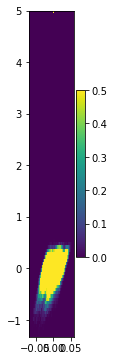

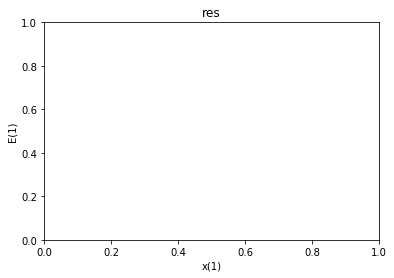

In [94]:
plt.figure(figsize=(1, 6))
H.plot(hh.load("test/res.h5"), max=.5)

In [95]:
ls -tl test

total 280896
-rw-r--r-- 1 lj7 users     37013 Dec  4 11:34 res.h5
-rw-r--r-- 1 lj7 users  47929800 Dec  4 11:34 probs.npy
-rw-r--r-- 1 lj7 users  47929800 Dec  4 11:34 dEs.npy
-rw-r--r-- 1 lj7 users  47929800 Dec  4 11:34 dxs.npy
-rw-r--r-- 1 lj7 users 143789240 Dec  4 11:34 dhkls.npy
-rw-r--r-- 1 lj7 users        32 Dec  4 11:26 mc_params.yml
-rw-r--r-- 1 lj7 users      1269 Nov  8 11:25 run.py
drwxr-xr-x 1 lj7 users         5 Nov  8 11:25 sample/


In [96]:
dhkls = np.load('test/dhkls.npy')
dEs = np.load('test/dEs.npy')
dxs = np.load('test/dxs.npy')

In [97]:
# np.histogram2d?

In [98]:
hist, xedges, Eedges = np.histogram2d(dxs, dEs, bins=(np.arange(-0.3, 0.3, 0.01), np.arange(-2,1,0.05)))

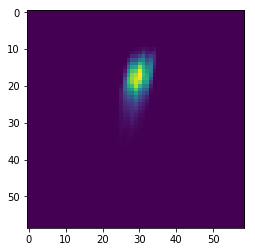

In [99]:
plt.figure(figsize=(6,4))
plt.imshow(hist.T[::-1])

In [100]:
qaxis = H.axis('q', boundaries=xedges)
Eaxis = H.axis('E', boundaries=Eedges)

In [101]:
reshist  = H.histogram('res', (qaxis, Eaxis), data=hist)

plot z in (0.0, 5200.0)


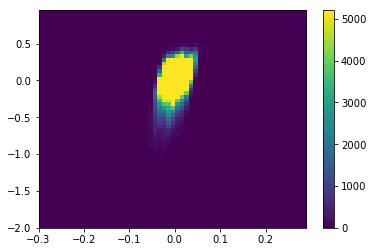

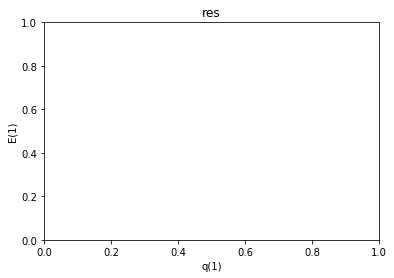

In [102]:
H.plot(reshist)

In [103]:
res_E = reshist.sum('q')

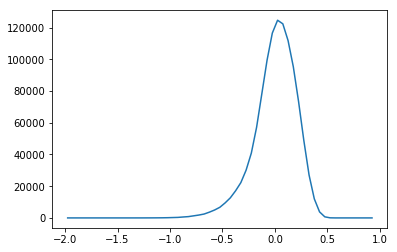

In [104]:
plt.plot(res_E.E, res_E.I)

In [105]:
res_q = reshist.sum('E')

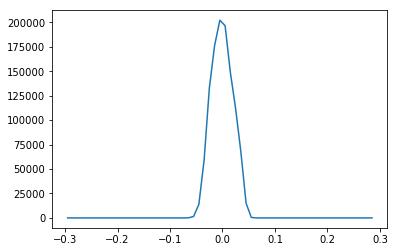

In [106]:
plt.plot(res_q.q, res_q.I)

# Fitting

## Fit I(E)

In [107]:
from dgsres import icg

In [108]:
cncs_geom = icg.Geom(l1=6.413, l2=36.2-6.413, l3=3.5)

In [109]:
Ei = 12.
E0 = 5.

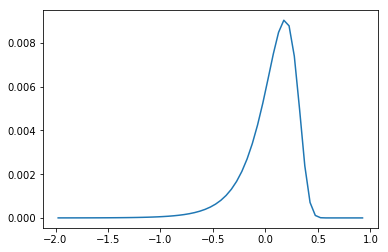

In [110]:
plt.plot(res_E.E, icg.resolution(E0+res_E.E, Ei, E0, 0.35, 0.13, .8, sigma=2, t0=15, geom=cncs_geom))

In [111]:
res_y = res_E.I.copy()
res_x = res_E.E.copy()
dx = res_x[1] - res_x[0]
res_y /= res_y.sum()*dx

In [112]:
import scipy.optimize as sopt

In [113]:
def make_cost(res_x, res_y):
    dx = res_x[1] - res_x[0]
    def cost(x):
        a, b, R, sigma, t0 = x
        yfit = icg.resolution(E0+res_x, Ei, E0, a, b, R, sigma=sigma, t0=t0, geom=cncs_geom)
        yfit /= yfit.sum()*dx
        return np.sum((yfit-res_y)**2)/res_y.size
    return cost

In [114]:
x0 =  0.35, 0.13, .8, 2, 16
bounds = np.array(
    [(0.2, 0.02, 0.01, 0.1, 1.),
     (0.8, 0.3, 0.99, 10., 200.)]
    ).T

In [115]:
fitres = sopt.minimize(make_cost(res_x, res_y), x0=x0, bounds=bounds, method='L-BFGS-B')

In [116]:
fitres.x

array([  0.23928148,   0.24058269,   0.99      ,   1.45417886,  13.66923872])

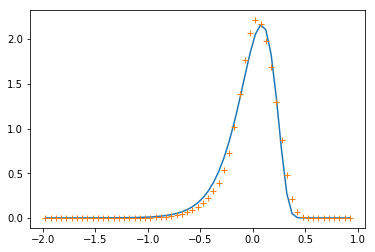

In [117]:
a,b,R,sigma,t0 = fitres.x
yfit = icg.resolution(E0+res_x, Ei, E0, a, b, R, sigma=sigma, t0=t0, geom=cncs_geom)
yfit /= yfit.sum()*dx
plt.plot(res_x, yfit)
plt.plot(res_x, res_y, '+')

In [128]:
fit_IE_res = fitres.x # a,b,R,sigma,t0

## Fit I(q)

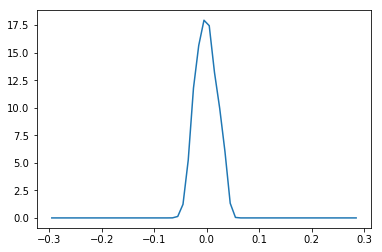

In [155]:
res_x = res_q.q
res_y = res_q.I
dx = res_x[1] - res_x[0]
res_y /= res_y.sum()*dx
plt.figure()
plt.plot(res_x, res_y)

In [123]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [156]:
popt,pcov = sopt.curve_fit(gaus,res_x,res_y,p0=[20,0,.03])

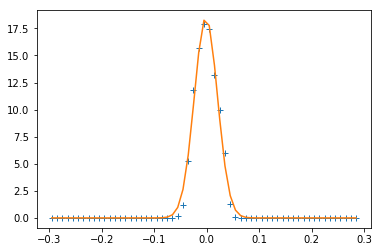

In [157]:
plt.figure()
plt.plot(res_x, res_y, '+')
plt.plot(res_x, gaus(res_x, *popt))

In [159]:
q_sigma = popt[-1]
print q_sigma

0.0221107344339


## res(q,E)

In [147]:
def ellipsoid_affine(q, E, dq_over_dE, q_sigma, E_profile):
    pE = E_profile(E)
    q1 = E*dq_over_dE
    px = gaus(q-q1, 1., 0., q_sigma)
    return px*pE

In [148]:
def res_qE(q, E, dq_over_dE, Eprofile_params, q_sigma, Ei, E0):
    a,b,R,sigma,t0 = Eprofile_params    
    E_profile = lambda E: icg.resolution(E0+E, Ei, E0, a, b, R, sigma=sigma, t0=t0, geom=cncs_geom)
    return ellipsoid_affine(q, E, dq_over_dE, q_sigma, E_profile)

In [149]:
qgrid, Egrid = np.meshgrid(reshist.q, reshist.E)

In [154]:
q_sigma

-0.0013218993096423535

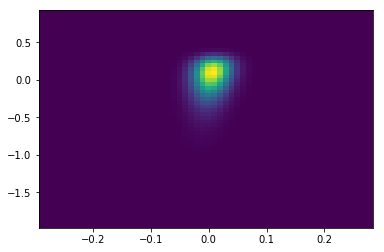

In [166]:
resmatrix = res_qE(qgrid, Egrid, 0.02, fit_IE_res, q_sigma, Ei=12, E0=5)
plt.figure()
plt.pcolormesh(qgrid, Egrid, resmatrix, cmap='viridis')

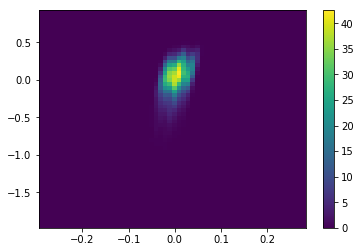

In [193]:
res_x = reshist.q
res_y = reshist.E
res_z = reshist.I.T.copy()
dx = res_x[1]-res_x[0]
dy = res_y[1]-res_y[0]
res_z /= np.sum(res_z)*dx*dy
plt.figure()
plt.pcolormesh(qgrid, Egrid, res_z, cmap='viridis')
plt.colorbar()

In [194]:
def make_cost(res_x, res_y, res_z, E_profile_params, q_sigma, Ei, E0):
    xgrid,ygrid = np.meshgrid(res_x, res_y)
    dx = res_x[1]-res_x[0]
    dy = res_y[1]-res_y[0]
    def cost(x):
        dq_over_dE, = x
        yfit = res_qE(xgrid, ygrid, dq_over_dE, E_profile_params, q_sigma, Ei=Ei, E0=E0)
        yfit /= yfit.sum()*dx*dy
        c =  np.sum((yfit-res_z)**2)/res_z.size
        print c
        return c
    return cost

In [195]:
x0 =  (0.01,)
bounds = np.array(
    [(0.,),
     (0.1,)]
    ).T

In [196]:
fitres = sopt.minimize(
    make_cost(res_x, res_y, res_z, fit_IE_res, q_sigma, Ei, E0),
    x0=x0, bounds=bounds)#, method='L-BFGS-B')

0.756510579064
0.756510452085
1.46359487848
1.46359514342
0.581494716856
0.581494712873
0.581328607792
0.581328607893
0.581328501094
0.581328501094


In [197]:
fitres

      fun: 0.58132850109441492
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([  7.77156117e-08])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 10
      nit: 3
   status: 0
  success: True
        x: array([ 0.03725564])

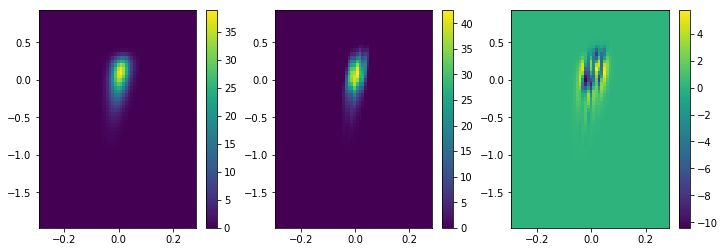

In [205]:
resmatrix = res_qE(qgrid, Egrid, fitres.x[0], fit_IE_res, q_sigma, Ei=12, E0=5)
resmatrix /= resmatrix.sum()*dx*dy

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.pcolormesh(qgrid, Egrid, resmatrix, cmap='viridis')
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(qgrid, Egrid, res_z, cmap='viridis')
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(qgrid, Egrid, resmatrix-res_z, cmap='viridis')
plt.colorbar()